## Data Visualization Assignment
### Transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

#### Iris Dataset from Sklearn

In [3]:
iris_2 = datasets.load_iris()

# iris_2.data
# iris_2.feature_names
# iris_2.target

df = pd.DataFrame(iris_2.data,columns=iris_2.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Reducing the dimensions to 3

pca = PCA(n_components=3)
new_data = pca.fit_transform(df)
new_df = pd.DataFrame(new_data,columns=['column1','column2','column3'])
new_df.head()

,column1,column2,column3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [5]:
### Converting the iris_2.target array to Series

# target_series = pd.Series(iris_2.target)
# pd.concat([new_df,target_series],axis=1)

In [6]:
## Converting the numpy array to data frame for concatenation

target_df = pd.DataFrame(iris_2.target, columns=['species'])
target_df.head()

,species
0,0
1,0
2,0
3,0
4,0


In [7]:
## The final dataframe with reduced dimensions

new_df = pd.concat([new_df,target_df], axis=1)
new_df.tail()

,column1,column2,column3,species
145,1.944110,0.187532,0.177825,2
146,1.527167,-0.375317,-0.121898,2
147,1.764346,0.078859,0.130482,2
148,1.900942,0.116628,0.723252,2
149,1.390189,-0.282661,0.362910,2


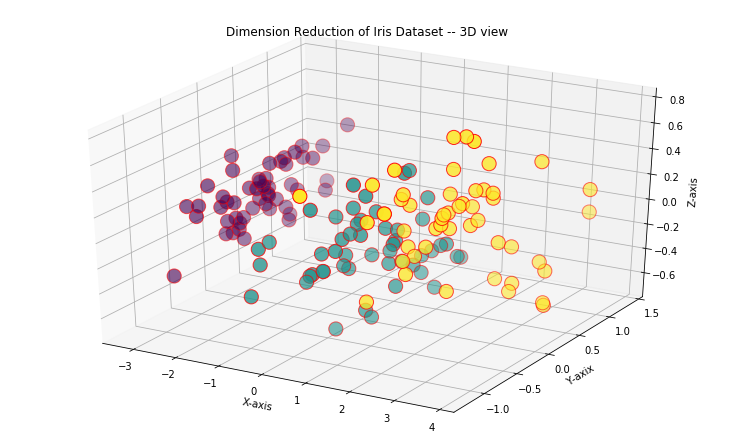

In [8]:
## Plotting a 3D chart with colored data point of specific class

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

ax.set_title("Dimension Reduction of Iris Dataset -- 3D view")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axix")
ax.set_zlabel("Z-axis")

ax1 = ax.scatter(new_df.column1, new_df.column2, new_df.column3,
           s=200,c=new_df.species,edgecolor='r')


plt.show()